"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.


In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.model_selection import train_test_split , RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report , accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt




In [ ]:
df=pd.read_csv('/content/drive/MyDrive/dataset/Travel.csv')
df

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [ ]:
df.shape

(4888, 20)

In [ ]:
df.dtypes

CustomerID                    int64
ProdTaken                     int64
Age                         float64
TypeofContact                object
CityTier                      int64
DurationOfPitch             float64
Occupation                   object
Gender                       object
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched               object
PreferredPropertyStar       float64
MaritalStatus                object
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                  object
MonthlyIncome               float64
dtype: object

In [ ]:
df['Gender'].value_counts()

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

In [ ]:
df['MaritalStatus'].value_counts()

Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64

In [ ]:
df['Gender']=df['Gender'].replace('Fe Male','Female')

df['MaritalStatus']=df['MaritalStatus'].replace('Unmarried','Single')

In [ ]:
df['Gender'].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

In [ ]:
df['MaritalStatus'].value_counts()

Married     2340
Single      1598
Divorced     950
Name: MaritalStatus, dtype: int64

In [ ]:
df.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [ ]:
cols=['Age','TypeofContact','DurationOfPitch','NumberOfFollowups','PreferredPropertyStar','NumberOfTrips','NumberOfChildrenVisiting','MonthlyIncome']

for col in cols:
  df[col]=df[col].fillna(df[col].mode()[0])

df.isna().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [ ]:
df['TotalPersonsVisiting']= df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
df.drop(['NumberOfPersonVisiting','NumberOfChildrenVisiting','CustomerID'],axis=1,inplace=True)


In [ ]:
df

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalPersonsVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Single,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,35.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,5.0,Deluxe,4.0,Single,2.0,1,1,1,Manager,26576.0,4.0
4884,1,28.0,Company Invited,1,31.0,Salaried,Male,5.0,Basic,3.0,Single,3.0,1,3,1,Executive,21212.0,6.0
4885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4.0,Standard,4.0,Married,7.0,0,1,1,Senior Manager,31820.0,7.0
4886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,4.0,Basic,3.0,Single,3.0,0,5,0,Executive,20289.0,5.0


In [ ]:
cols=['TypeofContact','Occupation','Gender','ProductPitched','MaritalStatus','Designation']

le=LabelEncoder()

for col in cols:
  df[col]=le.fit_transform(df[col])

df.dtypes

ProdTaken                   int64
Age                       float64
TypeofContact               int64
CityTier                    int64
DurationOfPitch           float64
Occupation                  int64
Gender                      int64
NumberOfFollowups         float64
ProductPitched              int64
PreferredPropertyStar     float64
MaritalStatus               int64
NumberOfTrips             float64
Passport                    int64
PitchSatisfactionScore      int64
OwnCar                      int64
Designation                 int64
MonthlyIncome             float64
TotalPersonsVisiting      float64
dtype: object

In [ ]:
df.corr()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalPersonsVisiting
ProdTaken,1.000000,-0.143675,-0.049492,0.086852,0.076089,-0.041042,0.031112,0.111560,-0.161262,0.098704,0.165216,0.023684,0.260844,0.051394,-0.011508,-0.097388,-0.116939,0.009759
Age,-0.143675,1.000000,0.021510,-0.011151,0.001440,0.027083,-0.039440,0.004418,0.452259,-0.016122,-0.099616,0.157800,0.032250,0.016973,0.047219,0.183406,0.461935,0.018251
TypeofContact,-0.049492,0.021510,1.000000,-0.009645,-0.024595,0.003434,0.000480,-0.016214,0.001658,0.031166,-0.036125,0.010168,0.000804,-0.018187,0.002970,0.004521,0.026994,-0.006232
CityTier,0.086852,-0.011151,-0.009645,1.000000,0.015197,0.131834,-0.021754,0.024333,0.141485,-0.008479,0.011336,-0.026066,0.001793,-0.042160,0.003817,0.120852,0.054881,-0.000508
DurationOfPitch,0.076089,0.001440,-0.024595,0.015197,1.000000,0.046930,0.011671,0.026178,0.036641,-0.004635,-0.010992,0.022792,0.035254,-0.002120,-0.003937,-0.030936,0.032202,0.075202
Occupation,-0.041042,0.027083,0.003434,0.131834,0.046930,1.000000,-0.006528,-0.015657,0.034749,0.024131,-0.021881,-0.035661,0.003653,-0.053928,-0.036508,0.027437,0.026718,0.003910
Gender,0.031112,-0.039440,0.000480,-0.021754,0.011671,-0.006528,1.000000,-0.004033,-0.056138,-0.023176,-0.025015,-0.006008,-0.037014,0.001867,-0.016136,-0.010481,-0.031023,0.008877
NumberOfFollowups,0.111560,0.004418,-0.016214,0.024333,0.026178,-0.015657,-0.004033,1.000000,0.004725,-0.026989,0.042217,0.127746,0.004411,0.004405,0.012186,0.047466,0.191661,0.336143
ProductPitched,-0.161262,0.452259,0.001658,0.141485,0.036641,0.034749,-0.056138,0.004725,1.000000,0.011271,-0.073456,0.039393,-0.013152,0.034038,0.070384,0.330022,0.693190,-0.025587
PreferredPropertyStar,0.098704,-0.016122,0.031166,-0.008479,-0.004635,0.024131,-0.023176,-0.026989,0.011271,1.000000,-0.009589,0.009782,0.001221,-0.024019,0.013577,-0.008228,-0.005553,0.034535


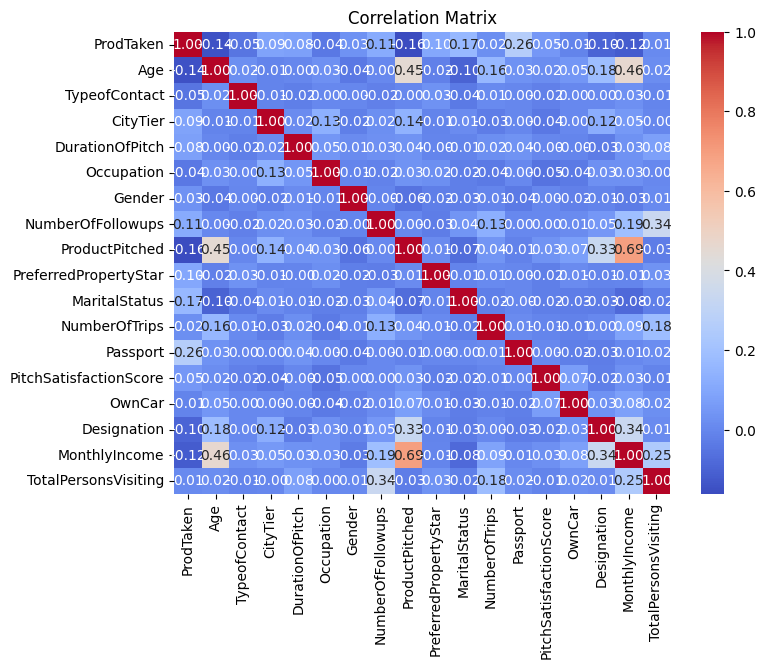

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
X=df.iloc[:,1:]
X

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalPersonsVisiting
0,41.0,1,3,6.0,2,0,3.0,1,3.0,2,1.0,1,2,1,2,20993.0,3.0
1,49.0,0,1,14.0,2,1,4.0,1,4.0,0,2.0,0,3,1,2,20130.0,5.0
2,37.0,1,1,8.0,0,1,4.0,0,3.0,2,7.0,1,3,0,1,17090.0,3.0
3,33.0,0,1,9.0,2,0,3.0,0,3.0,0,2.0,1,5,1,1,17909.0,3.0
4,35.0,1,1,8.0,3,1,3.0,0,4.0,0,1.0,0,5,1,1,18468.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,49.0,1,3,9.0,3,1,5.0,1,4.0,2,2.0,1,1,1,2,26576.0,4.0
4884,28.0,0,1,31.0,2,1,5.0,0,3.0,2,3.0,1,3,1,1,21212.0,6.0
4885,52.0,1,3,17.0,2,0,4.0,3,4.0,1,7.0,0,1,1,3,31820.0,7.0
4886,19.0,1,3,16.0,3,1,4.0,0,3.0,2,3.0,0,5,0,1,20289.0,5.0


In [ ]:
y=df.iloc[:,0]
y

0       1
1       0
2       1
3       0
4       0
       ..
4883    1
4884    1
4885    1
4886    1
4887    1
Name: ProdTaken, Length: 4888, dtype: int64

In [ ]:
y.value_counts()

0    3968
1     920
Name: ProdTaken, dtype: int64

<Axes: xlabel='ProdTaken', ylabel='count'>

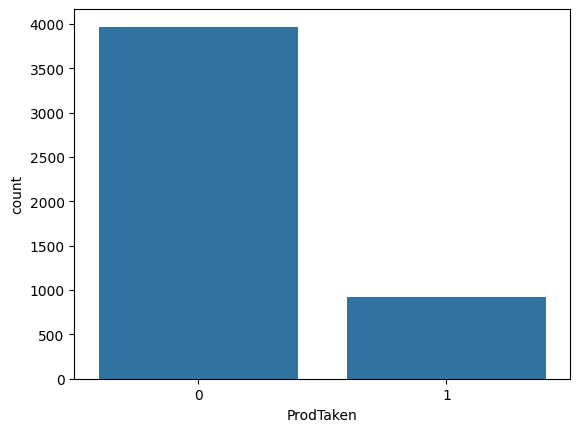

In [ ]:
sns.countplot(data=df,x=y,order=y.value_counts().index)

In [ ]:

from imblearn.over_sampling import SMOTE                     #synthetic minority oversampling technique
oversample=SMOTE(random_state=1)
X,y=oversample.fit_resample(X,y)

<Axes: xlabel='ProdTaken', ylabel='count'>

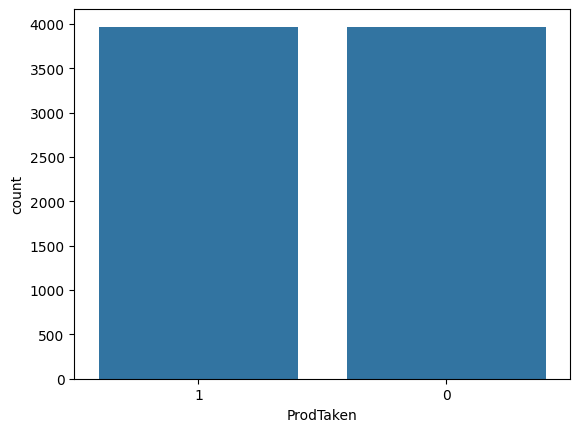

In [ ]:
sns.countplot(data=df,x=y,order=y.value_counts().index)

In [ ]:
scaler=MinMaxScaler()

X=scaler.fit_transform(X)
X

array([[0.53488372, 1.        , 1.        , ..., 0.5       , 0.20468273,
        0.33333333],
       [0.72093023, 0.        , 0.        , ..., 0.5       , 0.19584758,
        0.66666667],
       [0.44186047, 1.        , 0.        , ..., 0.25      , 0.16472491,
        0.33333333],
       ...,
       [0.06976744, 1.        , 0.5       , ..., 0.25      , 0.171035  ,
        0.47308742],
       [0.48956691, 1.        , 0.5       , ..., 0.5       , 0.23641048,
        0.38603461],
       [0.60174655, 0.        , 0.        , ..., 0.5       , 0.20522149,
        0.66666667]])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((5555, 17), (2381, 17), (5555,), (2381,))

In [ ]:
dt=DecisionTreeClassifier(random_state=1)
rf=RandomForestClassifier(random_state=1)
adb=AdaBoostClassifier(random_state=1)
gb=GradientBoostingClassifier(random_state=1)
accuracy=[]

models=[dt,rf,adb,gb]

for model in models:
  print('**********',model,'**********')
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))
  print('accuracy:',accuracy_score(y_test,y_pred)*100)
  accuracy.append(accuracy_score(y_test,y_pred)*100)

********** DecisionTreeClassifier(random_state=1) **********
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1176
           1       0.92      0.90      0.91      1205

    accuracy                           0.91      2381
   macro avg       0.91      0.91      0.91      2381
weighted avg       0.91      0.91      0.91      2381

accuracy: 91.22217555648888
********** RandomForestClassifier(random_state=1) **********
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1176
           1       0.97      0.94      0.96      1205

    accuracy                           0.96      2381
   macro avg       0.96      0.96      0.96      2381
weighted avg       0.96      0.96      0.96      2381

accuracy: 95.59008819823603
********** AdaBoostClassifier(random_state=1) **********
              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1176
  

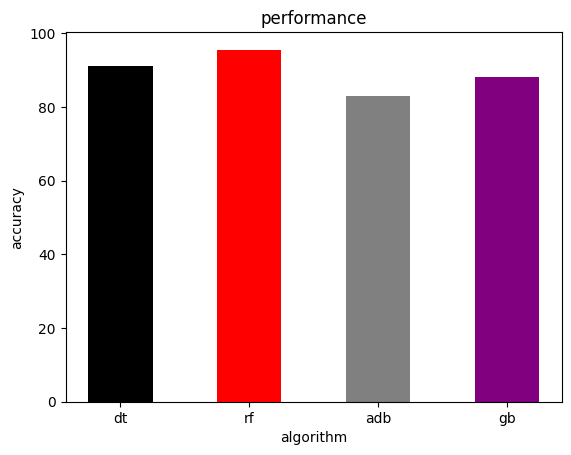

In [ ]:
x=['dt','rf','adb','gb']
y=accuracy
plt.bar(x,y,color=['black','red','grey','purple'],width=0.5)
plt.xlabel('algorithm')
plt.ylabel('accuracy')
plt.title('performance')
plt.show()

In [ ]:
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


In [ ]:
clf=RandomizedSearchCV(rf,params)
clf.fit(X_train,y_train)
print(clf.best_estimator_)

RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_split=5,
                       n_estimators=300, random_state=1)


In [ ]:
rf1=RandomForestClassifier(bootstrap=False, max_depth=20,
                       min_samples_split=5, n_estimators=300, random_state=1)
rf1.fit(X_train,y_train)
y_pred1=rf1.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      1176
           1       0.94      0.82      0.87      1205

    accuracy                           0.88      2381
   macro avg       0.89      0.88      0.88      2381
weighted avg       0.89      0.88      0.88      2381



In [ ]:
y_new=rf.predict(scaler.transform([[41.0,	1	,3	,6.0	,2	,0	,3.0	,1	,3.0	,2	,1.0	,1	,2	,1	,2	,20993.0	,3.0]]))

if y_new==1:
  print('product taken')
else:
  print('product not taken')

product taken
